Introdução

Esta análise exploratória tem como objetivo entender melhor o perfil dos clientes que dão churn — ou seja, que deixam o banco — a fim de identificar padrões e possíveis fatores que influenciam essa decisão.

Através da visualização e interpretação dos dados, buscamos responder perguntas como:

Existe um grupo de clientes mais propenso a sair do banco?

Fatores como idade, saldo, tempo de relacionamento ou número de produtos impactam no churn?

Há características que diferenciam claramente os clientes que ficam dos que saem?

Este estudo não realiza modelagem preditiva, mas sim uma exploração visual e estatística dos dados, servindo como base para futuras análises mais aprofundadas ou construção de modelos de machine learning.

Carregar Bibliotecas

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

Carregar Dataset

In [4]:
churn = pd.read_csv("../data/bank_customer.csv")
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
churn.nunique().sort_values()

gender                  2
churn                   2
active_member           2
credit_card             2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

In [8]:
# Quais os países de atuação?

paises = churn.country.unique()

print(f'Os países de atuação, são: {paises}')


Os países de atuação, são: ['France' 'Spain' 'Germany']


In [9]:
#Qual o intervalo de idade dos clientes?

idade_minima = churn.age.min()
idade_maxima = churn.age.max()

print(f'O dataset contém clientes cuja idade vai de {idade_minima} até {idade_maxima} anos')

O dataset contém clientes cuja idade vai de 18 até 92 anos


In [10]:
# Qual o saldo dos clientes?

saldo_min = churn.balance.min()
saldo_max = churn.balance.max()

print(f"O dataset contem clientes cujo saldo vai de {saldo_min} até {saldo_max} reais.")

O dataset contem clientes cujo saldo vai de 0.0 até 250898.09 reais.


Alguns clientes não possuem saldo na conta.

In [11]:
churn.query("balance == 0")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


Vamos verificar quais são os clientes com maior saldo e maior salário.

In [12]:
# Seleção dos top 5 clientes com base nos maiores saldos e salários estimados.

top_balance = churn.balance.nlargest(5).to_list()
top_salary = churn.estimated_salary.nlargest(5).to_list()

churn.query(f"balance in {top_balance} or estimated_salary in {top_salary}")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3580,15634359,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
3588,15571958,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
4417,15697270,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,15662021,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
6717,15586674,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
8926,15709136,620,France,Male,28,8,0.00,2,1,1,199909.32,0
9096,15762331,569,France,Male,37,9,178755.84,1,1,0,199929.17,0


EDA

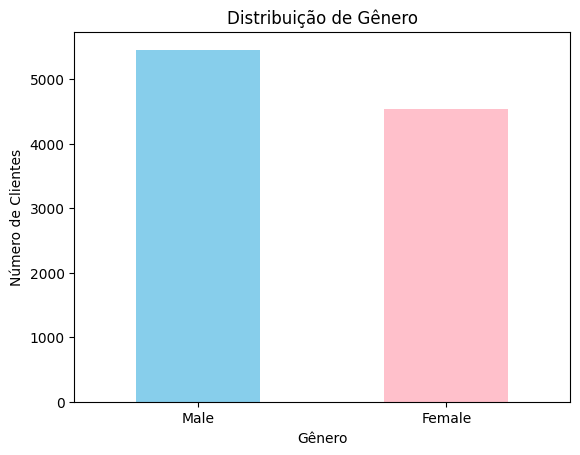

In [17]:
churn['gender'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

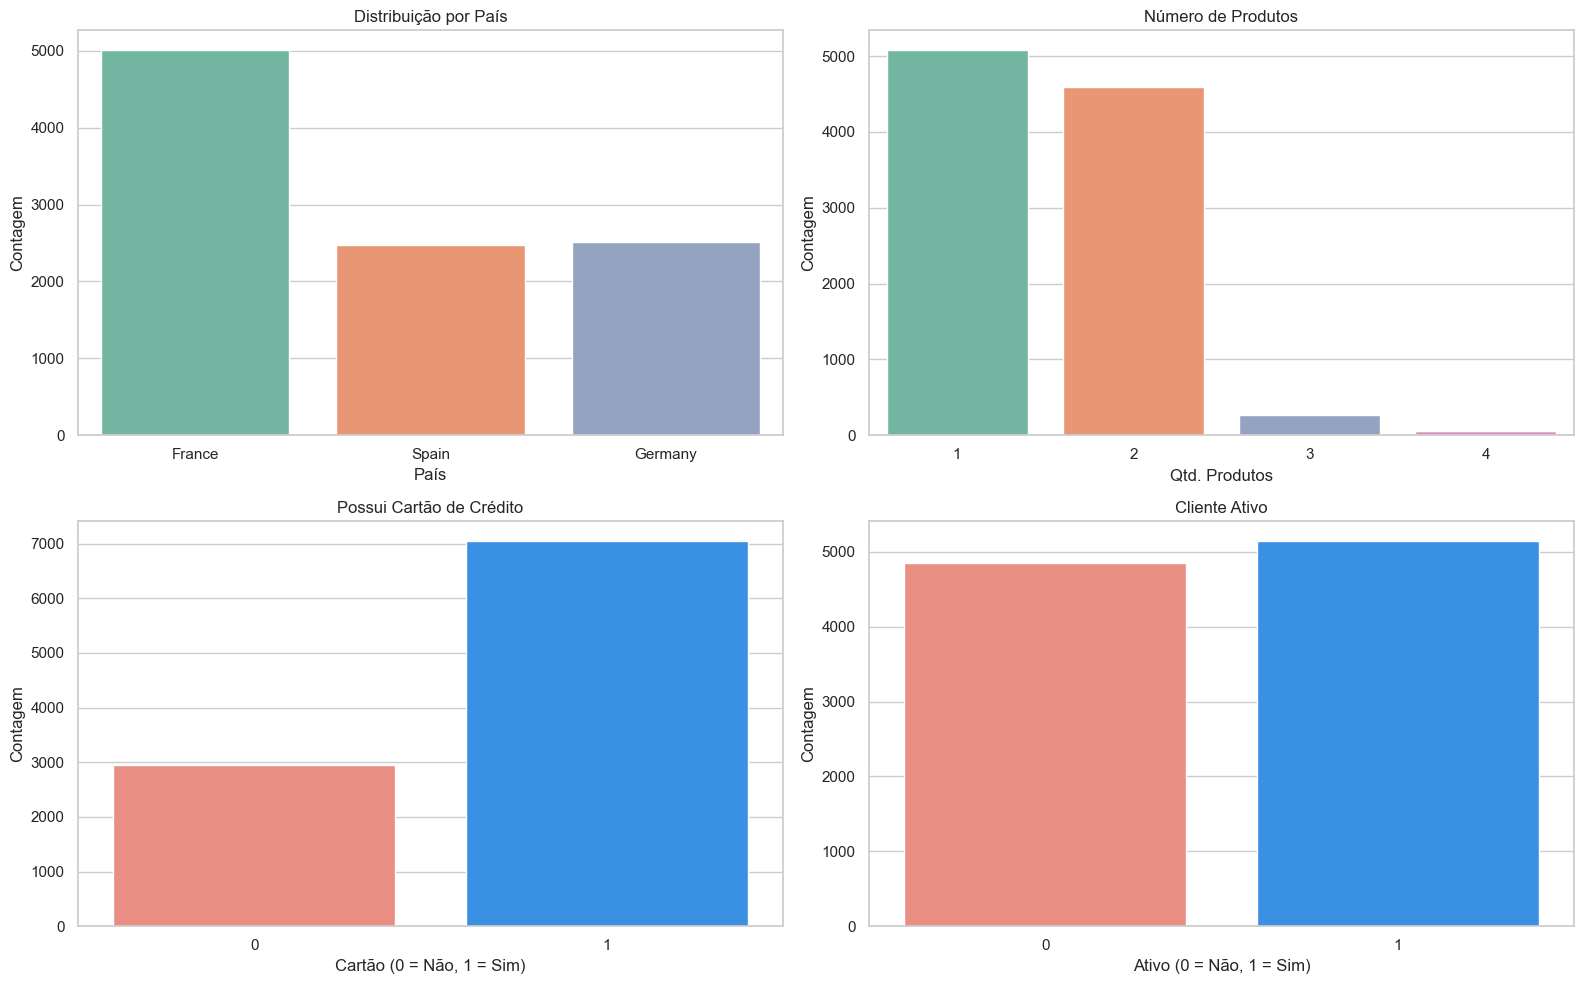

In [ ]:
# Estilo visual
sns.set_theme(style="whitegrid")

# Layout 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. COUNTRY 
sns.countplot(data=churn, x='country', hue='country', palette='Set2',ax=axes[0][0])
axes[0][0].set_title("Distribuição por País")
axes[0][0].set_xlabel("País")
axes[0][0].set_ylabel("Contagem")

# 2. PRODUCTS_NUMBER 
sns.countplot(data=churn, x='products_number', hue='products_number',
    palette='Set2', ax=axes[0][1],legend=False
)
axes[0][1].set_title("Número de Produtos")
axes[0][1].set_xlabel("Qtd. Produtos")
axes[0][1].set_ylabel("Contagem")

# 3. CREDIT_CARD (0 = não, 1 = sim)
sns.countplot( data=churn, x='credit_card', hue='credit_card', palette={0: 'salmon', 1: 'dodgerblue'},
    ax=axes[1][0], legend=False)
axes[1][0].set_title("Possui Cartão de Crédito")
axes[1][0].set_xlabel("Cartão (0 = Não, 1 = Sim)")
axes[1][0].set_ylabel("Contagem")

# 4. ACTIVE_MEMBER (0 = não, 1 = sim)
sns.countplot( data=churn, x='active_member', hue='active_member', palette={0: 'salmon', 1: 'dodgerblue'},
    ax=axes[1][1], legend=False
)
axes[1][1].set_title("Cliente Ativo")
axes[1][1].set_xlabel("Ativo (0 = Não, 1 = Sim)")
axes[1][1].set_ylabel("Contagem")

# Ajustes finais
plt.tight_layout()
plt.show()


O banco parece atuar com mais força na França.
Os clientes, em sua maioria, possuem 1 ou 2 produtos.
A maioria dos clientes possui cartão de crédito.

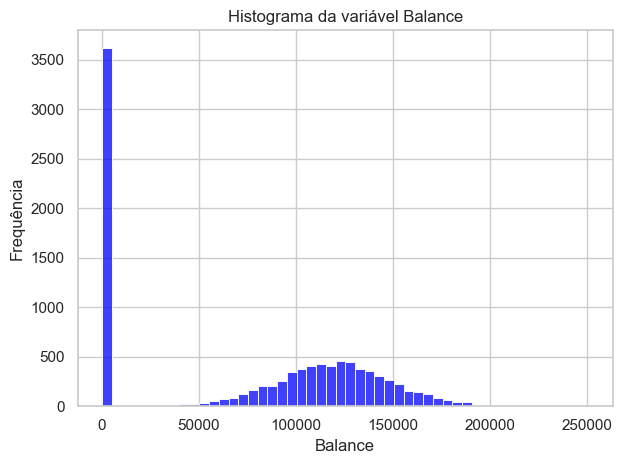

In [13]:
sns.histplot(data=churn, x='balance', bins=50, kde=False, color='blue')
plt.title('Histograma da variável Balance')
plt.xlabel('Balance')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

Qual o percentual de clientes com zero de saldo?

In [15]:
total = len(churn)
zerados = len(churn[churn['balance'] == 0])

percentual = (zerados / total) * 100

print(f"Clientes com saldo zero: {zerados} ({percentual:.2f}%)")

Clientes com saldo zero: 3617 (36.17%)


Relação entre Salário Estimado e Saldo por País

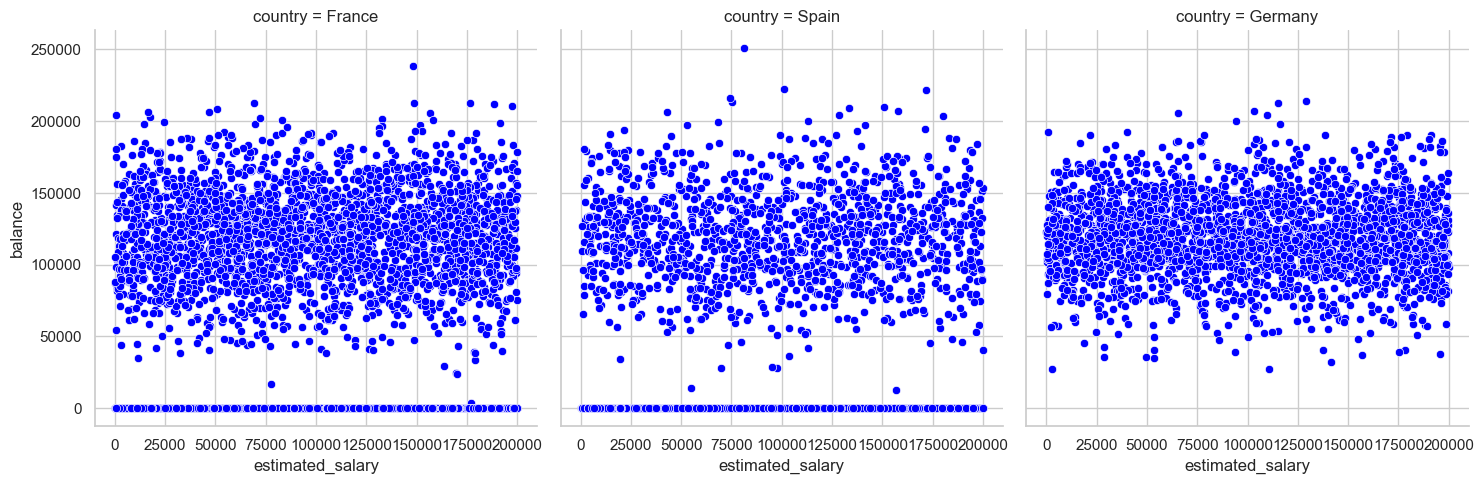

In [18]:
sns.relplot(x = 'estimated_salary', y = 'balance', data=churn, col='country', color='blue')
plt.show()

Não existe uma relação clara entre salário e saldo bancário.

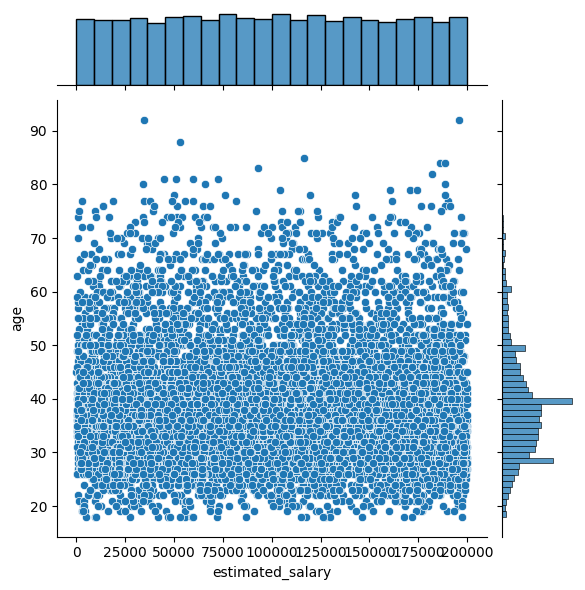

In [6]:
sns.jointplot(x='estimated_salary', y='age', data=churn)
plt.show()

In [7]:
churn['estimated_salary'].corr(churn['age'])

np.float64(-0.007201042376657297)

Análise de Churn

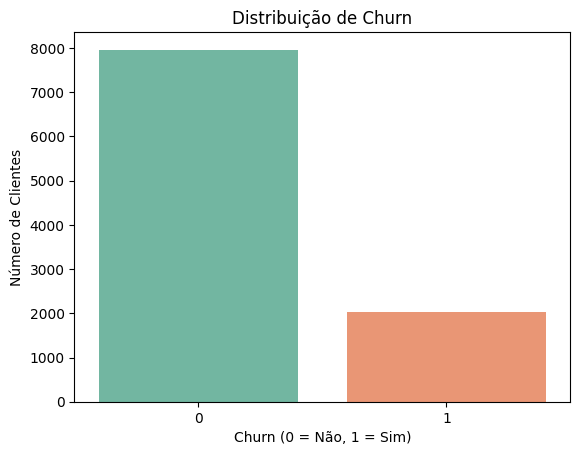

In [10]:
sns.countplot(x='churn', hue='churn', data=churn, palette='Set2', legend=False)
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()

Temos uma distribuição desbalanceada. Se for feito um modelo preditivo, é preciso encontrar os tratamentos corretos.

Ver como Churn se relaciona com as outras variáveis

C:\Users\myria\AppData\Local\Temp\ipykernel_18480\1125354503.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.boxplot(data=churn, x='churn', y='estimated_salary', ax=axes[0], palette=colors)
C:\Users\myria\AppData\Local\Temp\ipykernel_18480\1125354503.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.boxplot(data=churn, x='churn', y='balance', ax=axes[1], palette=colors)


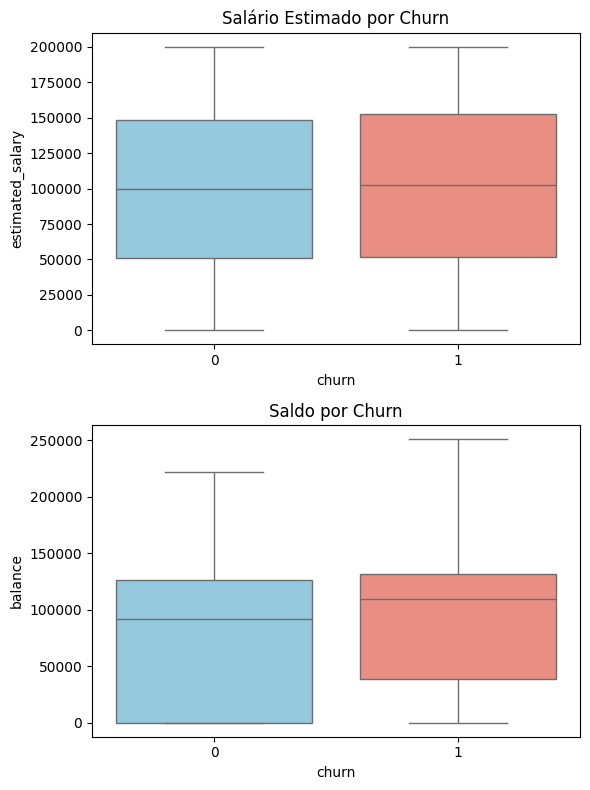

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# Cores para churn 0 e 1
colors = ['skyblue', 'salmon']

# Boxplot do salário
_ = sns.boxplot(data=churn, x='churn', y='estimated_salary', ax=axes[0], palette=colors)
axes[0].set_title('Salário Estimado por Churn')

# Boxplot do saldo
_ = sns.boxplot(data=churn, x='churn', y='balance', ax=axes[1], palette=colors)
axes[1].set_title('Saldo por Churn')

# Ajusta o layout
fig.tight_layout()
plt.show()


O salário não é um bom preditor de Churn. Por outro lado, o saldo, parece ter alguma relação com o Churn. As pessoas que dão churn possuem saldo menor.

In [13]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [14]:
churn.groupby('churn')['balance'].median()

churn
0     92072.68
1    109349.29
Name: balance, dtype: float64

In [15]:
churn.groupby('churn').agg({'balance':['mean', 'median']})

balance           
               mean     median
churn                         
0      72745.296779   92072.68
1      91108.539337  109349.29

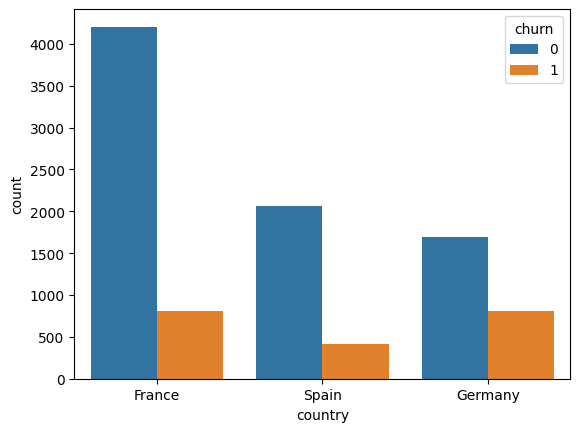

In [18]:
sns.countplot(data=churn, x='country', hue='churn')
plt.show()

In [20]:
churn.groupby('country')['churn'].mean().sort_values()

country
France     0.161548
Spain      0.166734
Germany    0.324432
Name: churn, dtype: float64

O país parece influenciar no churn.

In [22]:
# Ter cartão de crédito influencia no churn?
churn.groupby('credit_card')['churn'].mean().sort_values()

credit_card
1    0.201843
0    0.208149
Name: churn, dtype: float64

O cartão de crédito parece não influenciar muito. 

Conclusão

A análise exploratória realizada trouxe alguns insights importantes sobre o comportamento dos clientes do banco e possíveis fatores associados ao churn. Seguem os principais pontos observados:

A França representa a maior parte da base de clientes, indicando uma atuação mais concentrada do banco nesse país.

A maior parte dos clientes possui 1 ou 2 produtos bancários, e a maioria também possui cartão de crédito — o que parece ser um padrão comum, mas sem grande influência direta no churn.

Não há uma relação clara entre salário e saldo bancário, sugerindo que o nível de renda não determina diretamente quanto o cliente mantém em conta.

O salário não se mostrou um bom preditor de churn, mas o saldo bancário sim: clientes com saldos menores tendem a apresentar taxas mais altas de churn.

O país Alemanha apresentou uma taxa de churn elevada (32%), indicando que o fator geográfico pode ter influência importante no desligamento dos clientes.

Por fim, a posse de cartão de crédito não demonstrou grande impacto sobre a saída ou permanência dos clientes no banco.

Esses insights podem ajudar o banco a direcionar melhor suas estratégias de retenção, principalmente com foco em clientes com menor saldo, localizados na Alemanha, ou outros grupos que venham a ser identificados com análises mais profundas.